In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import stats
import math as m
import time

In [6]:
esample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/e_sample_for_Nz_imag_Mrest_included.npy')
nsample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/n_sample_for_Nz_imag_Mrest_included.npy')

In [7]:
sz_e = esample[:,0]
pz_e = esample[:,1]
imag_e = esample[:,2]
Mrest_e = esample[:,3]

In [8]:
sz_n = nsample[:,0]
pz_n = nsample[:,1]
imag_n = nsample[:,2]
Mrest_n = nsample[:,3]

In [9]:
print(esample.shape)
print(nsample.shape)

(79006336, 4)
(203682075, 4)


## Plot photo-z true z

Text(0, 0.5, 'Number Density')

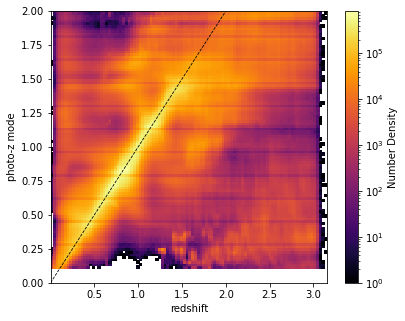

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6.2,5))
a = ax.hist2d(sz_n, pz_n, bins=(100, 100), cmap='inferno', norm=LogNorm())

x = np.arange(0.0,2.1, 0.1)
ax.plot(x,x, 'k', ls='--', lw='0.8')

ax.set_xlabel('redshift')
ax.set_ylabel('photo-z mode')
ax.set_ylim(0.0,2.0)
cbar = plt.colorbar(a[3], ax=ax)
cbar.ax.set_ylabel('Number Density')
#plt.savefig('n_sample_photoz_redshift_inferno.pdf')

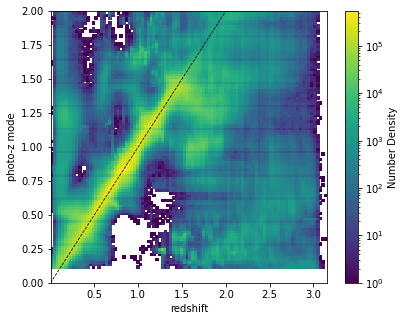

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6.2,5))
a = ax.hist2d(sz_e, pz_e, bins=(100, 100), cmap='viridis', norm=LogNorm())

x = np.arange(0.0,2.1, 0.1)
ax.plot(x,x, 'k', ls='--', lw='0.8')

ax.set_xlabel('redshift')
ax.set_ylabel('photo-z mode')
ax.set_ylim(0.0,2.0)
cbar = plt.colorbar(a[3], ax=ax)
cbar.ax.set_ylabel('Number Density')
plt.savefig('e_sample_photoz_redshift_viridis.pdf')

## Plot photo-z true z for full photo-z range in catalog

In [2]:
esample_no_zphot_max = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/e_sample_for_Nz_imag_Mrest_included_no_max_zphot_cut.npy')
nsample_no_zphot_max = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/n_sample_for_Nz_imag_Mrest_included_no_max_zphot_cut.npy')

In [3]:
sz_n_no_zphot_max = nsample_no_zphot_max[:,0]
pz_n_no_zphot_max = nsample_no_zphot_max[:,1]

In [7]:
sz_e_no_zphot_max = esample_no_zphot_max[:,0]
pz_e_no_zphot_max = esample_no_zphot_max[:,1]

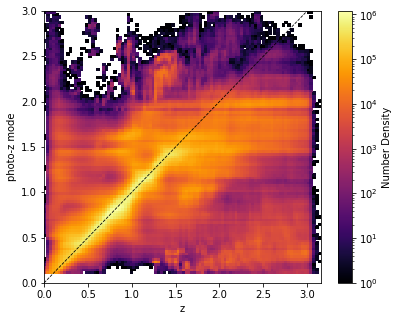

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6.2,5))
a = ax.hist2d(sz_n_no_zphot_max, pz_n_no_zphot_max, bins=(100, 100), cmap='inferno', norm=LogNorm())

x = np.arange(0.0,3.1, 0.1)
ax.plot(x,x, 'k', ls='--', lw='0.8')

ax.set_xlabel('z')
ax.set_ylabel('photo-z mode')
ax.set_ylim(0.0,3.0)
cbar = plt.colorbar(a[3], ax=ax)
cbar.ax.set_ylabel('Number Density')
plt.savefig('n_sample_photoz_redshift_inferno_zphot_max_3_new_label.pdf')

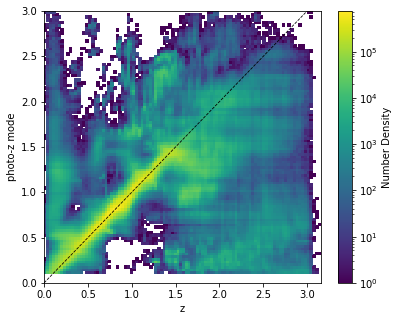

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6.2,5))
a = ax.hist2d(sz_e_no_zphot_max, pz_e_no_zphot_max, bins=(100, 100), cmap='viridis', norm=LogNorm())

x = np.arange(0.0,3.1, 0.1)
ax.plot(x,x, 'k', ls='--', lw='0.8')

ax.set_xlabel('z')
ax.set_ylabel('photo-z mode')
ax.set_ylim(0.0,3.0)
cbar = plt.colorbar(a[3], ax=ax)
cbar.ax.set_ylabel('Number Density')
plt.savefig('e_sample_photoz_redshift_viridis_zphot_max_3_new_label.pdf')

## Generate Nz distributions - paper plot made in Cosmosis

In [36]:
def generate_Nz(pz, sz, hist_color):
    bin_edges = stats.mstats.mquantiles(pz, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    
    nz_for_file = np.zeros((100, 11))
    
    hist_bins = np.arange(0.0,3.03,0.03)
    print(len(hist_bins))
    nz_for_file[:,0] = hist_bins[:-1] #lower bin edges required by load nz
    
    fig, ax = plt.subplots(1,1, figsize=(6.2,5))
    for i in np.arange(10):
        a = ax.hist(sz[(pz>=bin_edges[i]) & (pz<bin_edges[i+1])], bins=hist_bins, histtype='step', fill=False, edgecolor=hist_color)
        nz_for_file[:,i+1] = a[0]
        
    ax.set_xlabel('z')
    ax.set_ylabel('N(z)')
    
    return nz_for_file, bin_edges

101


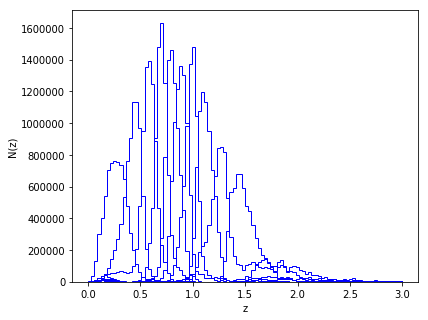

In [37]:
e_nz_for_file, e_bin_edges = generate_Nz(pz_e, sz_e, 'blue')

In [38]:
print(e_bin_edges)

[0.105      0.38499999 0.52499998 0.65499997 0.76499999 0.84500003
 0.935      1.06500006 1.19500005 1.375      1.995     ]


In [19]:
np.savetxt("e_sample_Nz_z3.txt", e_nz_for_file, fmt = "%.2f", delimiter=" ", header = "z, bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10")
#np.savetxt("e_tomo_bin_edges.txt", e_bin_edges)

In [20]:
np.array_equal(np.loadtxt("e_tomo_bin_edges.txt"), e_bin_edges) 

True

101


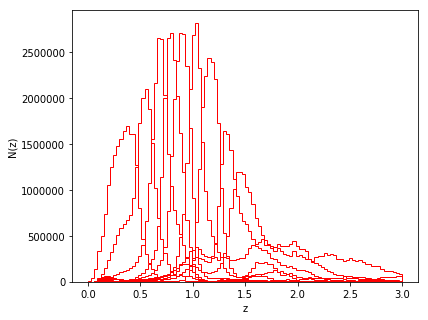

In [11]:
n_nz_for_file, n_bin_edges = generate_Nz(pz_n, sz_n, 'red')

In [12]:
print(n_bin_edges)

[0.105      0.47499999 0.625      0.745      0.83499998 0.95499998
 1.11500001 1.255      1.41499996 1.56500006 1.995     ]


In [21]:
np.savetxt("n_sample_Nz_z3.txt", n_nz_for_file, fmt = "%.2f", delimiter=" ", header = "z, bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9, bin10")
#np.savetxt("n_tomo_bin_edges.txt", n_bin_edges)

In [22]:
np.array_equal(np.loadtxt("n_tomo_bin_edges.txt"), n_bin_edges)

True

## comparison plots

Text(0, 0.5, 'N(z)')

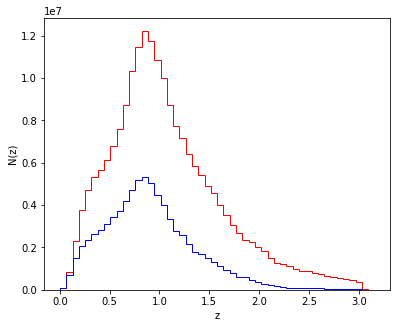

In [40]:
fig, ax = plt.subplots(1,1, figsize=(6.2,5))
ax.hist(sz_n, bins=50, histtype='step', fill=False, edgecolor='red')
ax.hist(sz_e, bins=50, histtype='step', fill=False, edgecolor='blue')
ax.set_xlabel('z')
ax.set_ylabel('N(z)')
#plt.savefig('both_samples_unbinned.pdf')

Text(0, 0.5, 'N(imag)')

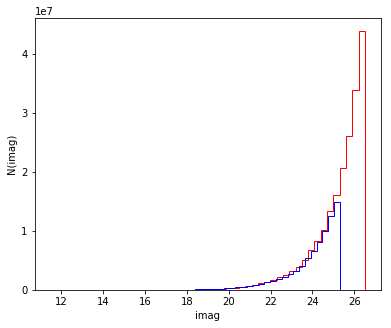

In [41]:
fig, ax = plt.subplots(1,1, figsize=(6.2,5))
ax.hist(imag_n, bins=50, histtype='step', fill=False, edgecolor='red')
ax.hist(imag_e, bins=50, histtype='step', fill=False, edgecolor='blue')
#ax.set_xlim(26.0, 27.0)
ax.set_xlabel('imag')
ax.set_ylabel('N(imag)')
#plt.savefig('both_samples_unbinned.pdf')

## Calculate faint end slope

In [2]:
def calculate_alphas(imag, pz, tomo_bin_edges, imag_limit, flux_limits):
    """
    Calculate alphas for plot (fit when calculate alphas for analysis)
    """
    
    alpha_points = np.zeros((10, len(flux_limits)-1))
    
    for i in np.arange(10):
        imag_bini = imag[(pz>=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1])]
        N_list = [len(imag_bini[imag_bini<value]) for index, value in enumerate(flux_limits)]
        
        gradients = np.diff(np.log10(N_list))/0.2
        alpha_points[i] = 2.5*gradients
    
    return alpha_points.flatten()

### bootstrap errors on alphas

In [120]:
A = np.vstack((imag_e,pz_e)).T
number_of_samples=100

sample_alpha_points = np.zeros((number_of_samples, 250))

start = time.time()

for j in np.arange(number_of_samples):
    sample = A[np.random.randint(A.shape[0], size=A.shape[0]), :]
    imag = sample[:,0]
    pz = sample[:,1]
    alpha_points = calculate_alphas(imag, pz, e_bin_edges, 25.3)
    sample_alpha_points[j] = alpha_points
    
end = time.time()
print('time elapsed:', (end - start))

print(sample_alpha_points.shape)

time elapsed: 2501.9756393432617
(100, 250)


In [121]:
print(sample_alpha_points)

[[0.64869496 0.6056877  0.57986226 ... 1.48424939 1.32821416 1.48652595]
 [0.64502846 0.60308368 0.58147598 ... 1.48178379 1.3254806  1.48784492]
 [0.64654427 0.6035308  0.58395951 ... 1.48330582 1.32742384 1.48632455]
 ...
 [0.65230061 0.60597763 0.57804698 ... 1.4831002  1.3245075  1.48678536]
 [0.65136772 0.60116898 0.57866184 ... 1.48303147 1.32647066 1.48973908]
 [0.65182694 0.60217949 0.58373716 ... 1.48459022 1.3268801  1.48633635]]


In [144]:
variance = np.var(sample_alpha_points, axis=0)

In [145]:
std_dev_alpha_points = np.sqrt(variance)

In [149]:
std_dev_alpha_points_for_plot = np.split(std_dev_alpha_points, 10)

In [204]:
np.savetxt('std_dev_alpha_plot_e_sample.txt', std_dev_alpha_points_for_plot)

In [192]:
A = np.vstack((imag_n,pz_n)).T
flux_limits_n = np.arange(21.5, 26.5+0.2, 0.2)

number_of_samples=100

sample_alpha_points_n = np.zeros((number_of_samples, 250))

start = time.time()

for j in np.arange(number_of_samples):
    sample = A[np.random.randint(A.shape[0], size=A.shape[0]), :]
    imag = sample[:,0]
    pz = sample[:,1]
    alpha_points = calculate_alphas(imag, pz, n_bin_edges, 26.5, flux_limits_n)
    sample_alpha_points_n[j] = alpha_points
    
end = time.time()
print('time elapsed:', (end - start))

print(sample_alpha_points_n.shape)

time elapsed: 7187.1277115345
(100, 250)


In [194]:
print(sample_alpha_points_n)

[[0.560881   0.55295737 0.54676802 ... 2.32663534 2.21760414 2.03557187]
 [0.5620049  0.55318977 0.54484488 ... 2.32529276 2.21764908 2.0377971 ]
 [0.56202862 0.55303985 0.54475624 ... 2.3244496  2.22070683 2.03475238]
 ...
 [0.56269444 0.55541762 0.54740705 ... 2.32620121 2.21881994 2.03546574]
 [0.56387239 0.55405763 0.54725099 ... 2.32288899 2.21798936 2.03487604]
 [0.56116818 0.55485199 0.54750859 ... 2.32340432 2.21816738 2.03588026]]


In [195]:
variance_n = np.var(sample_alpha_points_n, axis=0)

In [196]:
print(variance_n.shape)

(250,)


In [197]:
std_dev_alpha_points_n = np.sqrt(variance_n)

In [198]:
std_dev_alpha_points_for_plot_n = np.split(std_dev_alpha_points_n, 10)

In [203]:
np.savetxt('std_dev_alpha_plot_n_sample.txt', std_dev_alpha_points_for_plot_n)

In [3]:
std_dev_alpha_points_for_plot_n = np.loadtxt('std_dev_alpha_plot_n_sample.txt')
std_dev_alpha_points_for_plot = np.loadtxt('std_dev_alpha_plot_e_sample.txt')

### paper alpha plot

In [14]:
e_bin_edges = np.loadtxt("e_tomo_bin_edges.txt")
n_bin_edges = np.loadtxt("n_tomo_bin_edges.txt")

flux limits e: [20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9
 23.1 23.3 23.5 23.7 23.9 24.1 24.3 24.5 24.7 24.9 25.1 25.3]
lower fit limit e: 24.299999999999986
flux limits n: [21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.1 23.3 23.5 23.7 23.9 24.1
 24.3 24.5 24.7 24.9 25.1 25.3 25.5 25.7 25.9 26.1 26.3 26.5]
lower fit limit n: 25.499999999999986


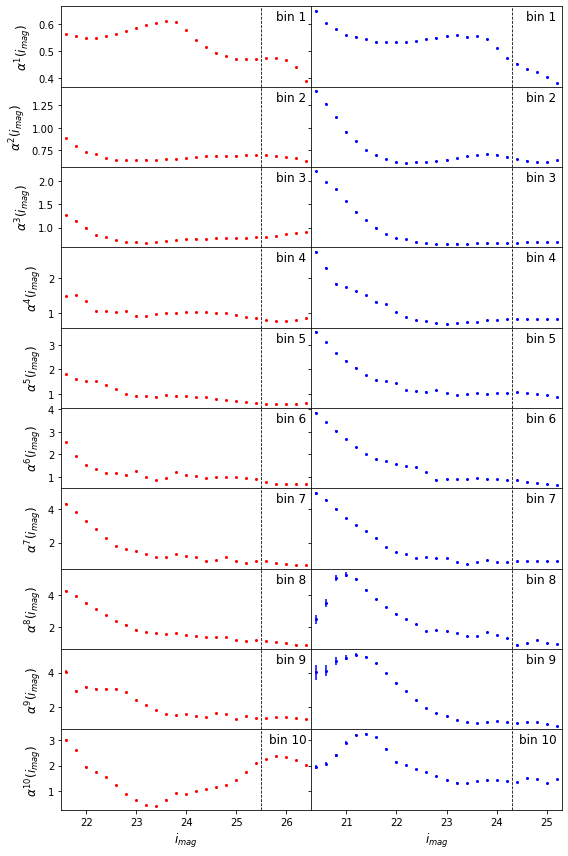

In [17]:
fig, ax = plt.subplots(10,2, figsize=(8,12), sharex='col', sharey='row')

flux_limits_e = np.arange(20.3, 25.3+0.2, 0.2)
print('flux limits e:', flux_limits_e)
lower_fit_index_e = 20
print('lower fit limit e:', flux_limits_e[lower_fit_index_e])

flux_limits_n = np.arange(21.5, 26.5+0.2, 0.2)
print('flux limits n:', flux_limits_n)
lower_fit_index_n = 20
print('lower fit limit n:', flux_limits_n[lower_fit_index_n])

alpha_e = np.zeros(10)
alpha_n = np.zeros(10)

alpha_points_e = calculate_alphas(imag_e, pz_e, e_bin_edges, 25.3, flux_limits_e)
alpha_points_array_e = np.split(alpha_points_e,10)

alpha_points_n = calculate_alphas(imag_n, pz_n, n_bin_edges, 26.5, flux_limits_n)
alpha_points_array_n = np.split(alpha_points_n,10)

for i in np.arange(10):
    flux_midpoints_e = flux_limits_e[:-1]+0.1
    ax[i][1].errorbar(flux_midpoints_e, alpha_points_array_e[i], yerr=std_dev_alpha_points_for_plot[i], fmt='o', ms=2, color='blue')

    alpha_e[i] = np.mean(alpha_points_array_e[i][lower_fit_index_e:])
    #alpha_e[i] =  alpha_points_array_e[i][-1]
    
    ax[i][1].axvline(24.3, color='k', ls='--', lw='0.8')

    ax[i][1].set_xlabel('$i_{mag}$', fontsize=12)
    #ax[i][1].set_ylabel(r'$\alpha(i_{mag})$')
    ax[i][1].set_xticks([21.0, 22.0, 23.0, 24.0, 25.0])
    ax[i][1].set_xlim(20.3, 25.3)
    ax[i][1].text(0.98, 0.95,'bin '+str(i+1), verticalalignment='top', horizontalalignment='right', transform=ax[i][1].transAxes, fontsize=12)
    
for i in np.arange(10):
    flux_midpoints_n = flux_limits_n[:-1]+0.1
    ax[i][0].errorbar(flux_midpoints_n, alpha_points_array_n[i], yerr=std_dev_alpha_points_for_plot_n[i], fmt='o', ms=2, color='red')

    alpha_n[i] = np.mean(alpha_points_array_n[i][lower_fit_index_n:])
    #alpha_n[i] =  alpha_points_array_n[i][-1]
    
    ax[i][0].axvline(25.5, color='k', ls='--', lw='0.8')

    ax[i][0].set_xlabel('$i_{mag}$', fontsize=12)
    ax[i][0].set_ylabel(r'$\alpha^{' + str(i+1) + '}(i_{mag})$', fontsize=12)
    ax[i][0].set_xticks([22.0, 23.0, 24.0, 25.0, 26.0])
    ax[i][0].set_xlim(21.5, 26.5)
    ax[i][0].text(0.98, 0.95,'bin '+str(i+1), verticalalignment='top', horizontalalignment='right', transform=ax[i][0].transAxes, fontsize=12)
    
plt.tight_layout()
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.savefig('alpha_with_magnitude_for_thesis.pdf')


In [ ]:
#alpha_e end point = [0.38054528 0.63935306 0.69625924 0.83999764 0.87056777 0.65641992 0.91257422 0.89741567 0.94091136 1.48717946]
#alpha_n end point = [0.38889473 0.63014038 0.90193527 0.86321104 0.61154667 0.69147648 0.65791284 0.82214475 1.3279714  2.03549944]

In [13]:
print(alpha_e)

[0.41770558 0.63633991 0.68433333 0.83493309 0.97731538 0.7518578
 0.90676503 0.98057898 1.08436322 1.43854178]


In [ ]:
#alpha_e_fit 0.2 separation of flux limits
#[0.41798235 0.63382747 0.68438945 0.8350362  0.98014027 0.75124575 0.90847455 1.00126702 1.09694675 1.44096223]
#alpha_e_fit 0.1 separation of flux limits
#[0.39944265 0.60823216 0.65910608 0.80320421 0.93665657 0.71496407 0.87212704 0.9618454  1.04900547 1.38590852]

In [30]:
print(alpha_e_fit) #0.05 separation of flux limits

[0.41154888 0.62449181 0.67707262 0.82526428 0.96597332 0.7372648
 0.89543777 0.99313255 1.08413964 1.42471362]


In [14]:
print(alpha_n)

[0.4473637  0.66985306 0.85504028 0.79961848 0.58377457 0.71329715
 0.75574146 0.96734151 1.3992083  2.24448768]


In [ ]:
#alpha_n_fit 0.2 separation of flux limits
#[0.45068574 0.67140998 0.85530911 0.79311138 0.58102277 0.70770626 0.75178985 0.96671385 1.4075874  2.26203427]
#alpha_n_fit 0.1 separation of flux limits
#[0.43103851 0.64375007 0.82604223 0.76345083 0.55923712 0.67583091 0.71392122 0.918229   1.35226872 2.16902646]

In [31]:
print(alpha_n_fit) #0.05 separation of flux limits

[0.4452547  0.66299562 0.84771632 0.78136281 0.57325728 0.6937
 0.73538466 0.94726057 1.39328787 2.23873576]


### save alphas for analysis

In [27]:
def fit_alpha(imag, pz, tomo_bin_edges, flux_limits, lower_fit_limit):   
    #alpha_fit = np.zeros(10)
    alpha_fit_2 = np.zeros(10)
    errors = np.zeros(10)
    
    index_lower_fit_limit = (np.abs(flux_limits - lower_fit_limit)).argmin()
    print('flux limits:', flux_limits)
    print('lower_fit_limit:', flux_limits[index_lower_fit_limit])
    
    for i in np.arange(10):
        imag_bini = imag[(pz>=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1])]
        N_list = [len(imag_bini[imag_bini<value]) for index, value in enumerate(flux_limits)]

        #slope, intercept = np.polyfit(flux_limits[index_lower_fit_limit:], np.log10(N_list[index_lower_fit_limit:]), 1)
        #alpha_fit[i]=2.5*slope

        p,V = np.polyfit(flux_limits[index_lower_fit_limit:], np.log10(N_list[index_lower_fit_limit:]), 1, cov=True)
        alpha_fit_2[i]=2.5*p[0]
        errors[i]=2.5*np.sqrt(V[0][0])
        
    return alpha_fit_2, errors

In [32]:
alpha_e_fit2, errors2_e = fit_alpha(imag_e, pz_e, e_bin_edges, np.arange(20.3, 25.3+0.05, 0.05), 24.3)

flux limits: [20.3  20.35 20.4  20.45 20.5  20.55 20.6  20.65 20.7  20.75 20.8  20.85
 20.9  20.95 21.   21.05 21.1  21.15 21.2  21.25 21.3  21.35 21.4  21.45
 21.5  21.55 21.6  21.65 21.7  21.75 21.8  21.85 21.9  21.95 22.   22.05
 22.1  22.15 22.2  22.25 22.3  22.35 22.4  22.45 22.5  22.55 22.6  22.65
 22.7  22.75 22.8  22.85 22.9  22.95 23.   23.05 23.1  23.15 23.2  23.25
 23.3  23.35 23.4  23.45 23.5  23.55 23.6  23.65 23.7  23.75 23.8  23.85
 23.9  23.95 24.   24.05 24.1  24.15 24.2  24.25 24.3  24.35 24.4  24.45
 24.5  24.55 24.6  24.65 24.7  24.75 24.8  24.85 24.9  24.95 25.   25.05
 25.1  25.15 25.2  25.25 25.3  25.35]
lower_fit_limit: 24.300000000000058


In [36]:
print(alpha_e_fit)
print(alpha_e_fit2)
print(errors2_e)

[0.41154888 0.62449181 0.67707262 0.82526428 0.96597332 0.7372648
 0.89543777 0.99313255 1.08413964 1.42471362]
[0.41154888 0.62449181 0.67707262 0.82526428 0.96597332 0.7372648
 0.89543777 0.99313255 1.08413964 1.42471362]
[0.00455168 0.00445529 0.00445899 0.00557221 0.01135513 0.0104167
 0.00621005 0.01306614 0.01422281 0.01149287]


In [22]:
alpha_n_fit = fit_alpha(imag_n, pz_n, n_bin_edges, np.arange(21.5, 26.5+0.05, 0.05), 25.5)

flux limits: [21.5  21.55 21.6  21.65 21.7  21.75 21.8  21.85 21.9  21.95 22.   22.05
 22.1  22.15 22.2  22.25 22.3  22.35 22.4  22.45 22.5  22.55 22.6  22.65
 22.7  22.75 22.8  22.85 22.9  22.95 23.   23.05 23.1  23.15 23.2  23.25
 23.3  23.35 23.4  23.45 23.5  23.55 23.6  23.65 23.7  23.75 23.8  23.85
 23.9  23.95 24.   24.05 24.1  24.15 24.2  24.25 24.3  24.35 24.4  24.45
 24.5  24.55 24.6  24.65 24.7  24.75 24.8  24.85 24.9  24.95 25.   25.05
 25.1  25.15 25.2  25.25 25.3  25.35 25.4  25.45 25.5  25.55 25.6  25.65
 25.7  25.75 25.8  25.85 25.9  25.95 26.   26.05 26.1  26.15 26.2  26.25
 26.3  26.35 26.4  26.45 26.5  26.55]
lower_fit_limit: 25.500000000000057


In [34]:
alpha_n_fit2, errors2_n = fit_alpha(imag_n, pz_n, n_bin_edges, np.arange(21.5, 26.5+0.05, 0.05), 25.5)

flux limits: [21.5  21.55 21.6  21.65 21.7  21.75 21.8  21.85 21.9  21.95 22.   22.05
 22.1  22.15 22.2  22.25 22.3  22.35 22.4  22.45 22.5  22.55 22.6  22.65
 22.7  22.75 22.8  22.85 22.9  22.95 23.   23.05 23.1  23.15 23.2  23.25
 23.3  23.35 23.4  23.45 23.5  23.55 23.6  23.65 23.7  23.75 23.8  23.85
 23.9  23.95 24.   24.05 24.1  24.15 24.2  24.25 24.3  24.35 24.4  24.45
 24.5  24.55 24.6  24.65 24.7  24.75 24.8  24.85 24.9  24.95 25.   25.05
 25.1  25.15 25.2  25.25 25.3  25.35 25.4  25.45 25.5  25.55 25.6  25.65
 25.7  25.75 25.8  25.85 25.9  25.95 26.   26.05 26.1  26.15 26.2  26.25
 26.3  26.35 26.4  26.45 26.5  26.55]
lower_fit_limit: 25.500000000000057


In [37]:
print(alpha_n_fit)
print(alpha_n_fit2)
print(errors2_n)

[0.4452547  0.66299562 0.84771632 0.78136281 0.57325728 0.6937
 0.73538466 0.94726057 1.39328787 2.23873576]
[0.4452547  0.66299562 0.84771632 0.78136281 0.57325728 0.6937
 0.73538466 0.94726057 1.39328787 2.23873576]
[0.00545658 0.00595381 0.00584537 0.00469131 0.00352381 0.00637645
 0.01109272 0.01507103 0.01199205 0.02363523]


In [32]:
np.savetxt('e_alphas_fit_new.txt', alpha_e_fit)
np.savetxt('n_alphas_fit_new.txt', alpha_n_fit)

In [30]:
print(alpha_e_fit2)
print(np.loadtxt('e_alphas_fit_new.txt'))

[0.41154888 0.62449181 0.67707262 0.82526428 0.96597332 0.7372648
 0.89543777 0.99313255 1.08413964 1.42471362]
[0.41154888 0.62449181 0.67707262 0.82526428 0.96597332 0.7372648
 0.89543777 0.99313255 1.08413964 1.42471362]


In [31]:
print(alpha_n_fit2)
print(errors)
print(np.loadtxt('n_alphas_fit_new.txt'))

[0.4452547  0.66299562 0.84771632 0.78136281 0.57325728 0.6937
 0.73538466 0.94726057 1.39328787 2.23873576]
[0.4452547  0.66299562 0.84771632 0.78136281 0.57325728 0.6937
 0.73538466 0.94726057 1.39328787 2.23873576]
